<span style="font-size: 36px;">Task 1.1</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from math import ceil  
import sys
import os

sys.path.insert(0, os.path.abspath(r'C:\Users\User\Desktop\Week-2\scripts'))

from UserOverviewanalysis import analyze_duplicated_bearer_ids, additional_aggregations

df = pd.read_csv('C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source(CSV).csv')

df.head()

duplicates_sample, duration_stats, aggregated_data = analyze_duplicated_bearer_ids(df)
xdr_sessions_per_user, session_duration, data_usage, total_data_volume = additional_aggregations(df)


Sample of records with duplicated 'Bearer Id':
        Bearer Id            Start  Start ms             End  End ms  \
20  1.304243e+19   4/17/2019 0:35     363.0  4/25/2019 4:52   691.0   
30  1.304243e+19   4/18/2019 0:35     711.0  4/25/2019 4:52   691.0   
43  1.304243e+19   4/19/2019 2:55     809.0  4/25/2019 0:17   262.0   
50  1.304243e+19   4/20/2019 2:55     691.0  4/25/2019 0:17   262.0   
58  7.277826e+18  4/20/2019 14:08     136.0  4/25/2019 0:54    79.0   
62  1.304243e+19   4/21/2019 2:55      73.0  4/25/2019 0:17   262.0   
63  1.304243e+19   4/21/2019 3:04     521.0  4/25/2019 4:02   116.0   
72  7.277826e+18  4/21/2019 13:57     724.0  4/25/2019 0:54    79.0   
82  1.304243e+19   4/22/2019 0:35     293.0  4/25/2019 0:35    30.0   
84  1.304243e+19   4/22/2019 1:17     301.0  4/25/2019 1:17   938.0   

    Dur. (ms)          IMSI  MSISDN/Number          IMEI Last Location Name  \
20   706649.0  2.082010e+14   3.365875e+10  8.654080e+13            T29714B   
30   620248.

<span style="font-size: 30px;">Task 1.2 </span>

Data Types:
 duration_ms     float64
social_media    float64
google          float64
email           float64
youtube         float64
netflix         float64
gaming          float64
total_data      float64
other_data      float64
dtype: object

Total Data per Decile Class:
    decile    total_data
0       1  2.763221e+09
1       2  2.523488e+09
2       3  3.261331e+09
3       4  2.867356e+09
4       5  2.959188e+09
5       6  2.736023e+09
6       7  1.924994e+09
7       8  1.983292e+09
8       9  2.920837e+09
9      10  2.220981e+09

Basic Metrics:
         duration_ms  social_media        google         email       youtube  \
count  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02  1.000000e+02   
mean   6.360757e+04  8.914855e+05  4.170083e+06  1.040944e+06  1.183157e+07   
std    5.420618e+05  5.958345e+05  2.360476e+06  5.966313e+05  6.551958e+06   
min   -1.178790e+06 -4.759800e+05 -1.528691e+06 -5.339798e+05 -3.085736e+06   
25%   -3.240851e+05  4.910306e+05  2.499031e+06  6

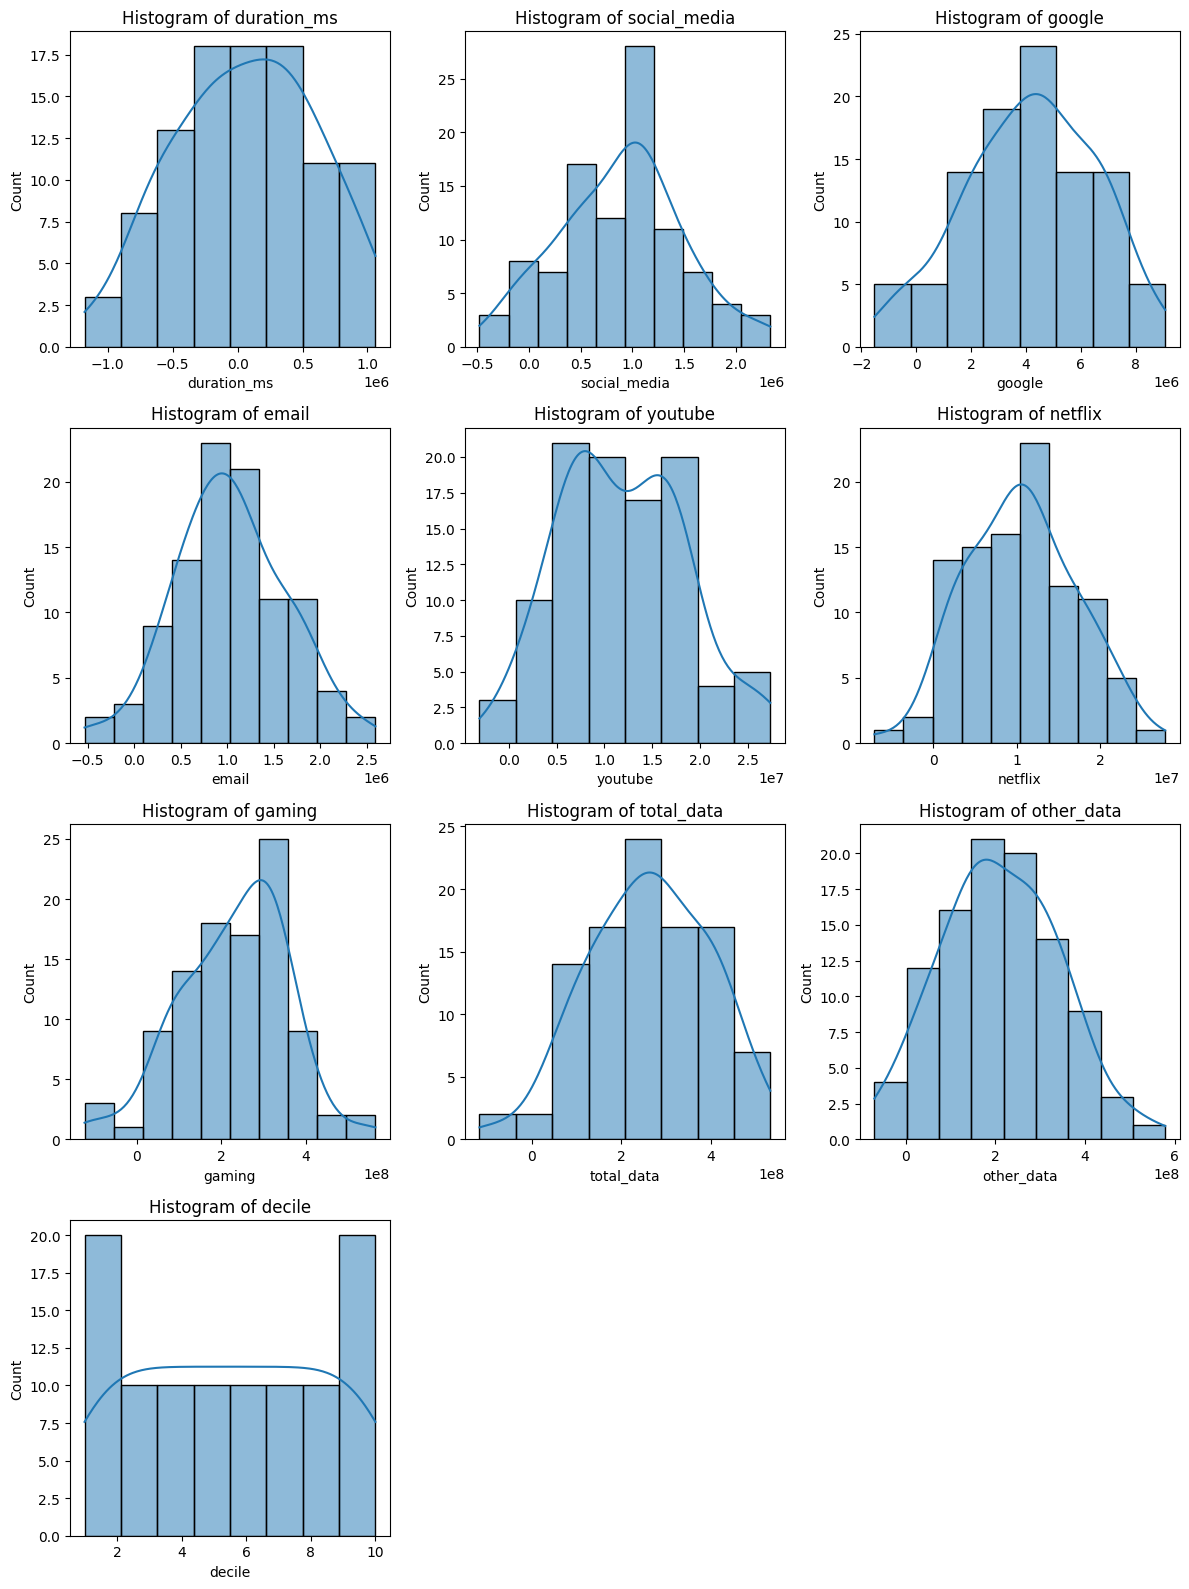

<Figure size 1200x600 with 0 Axes>

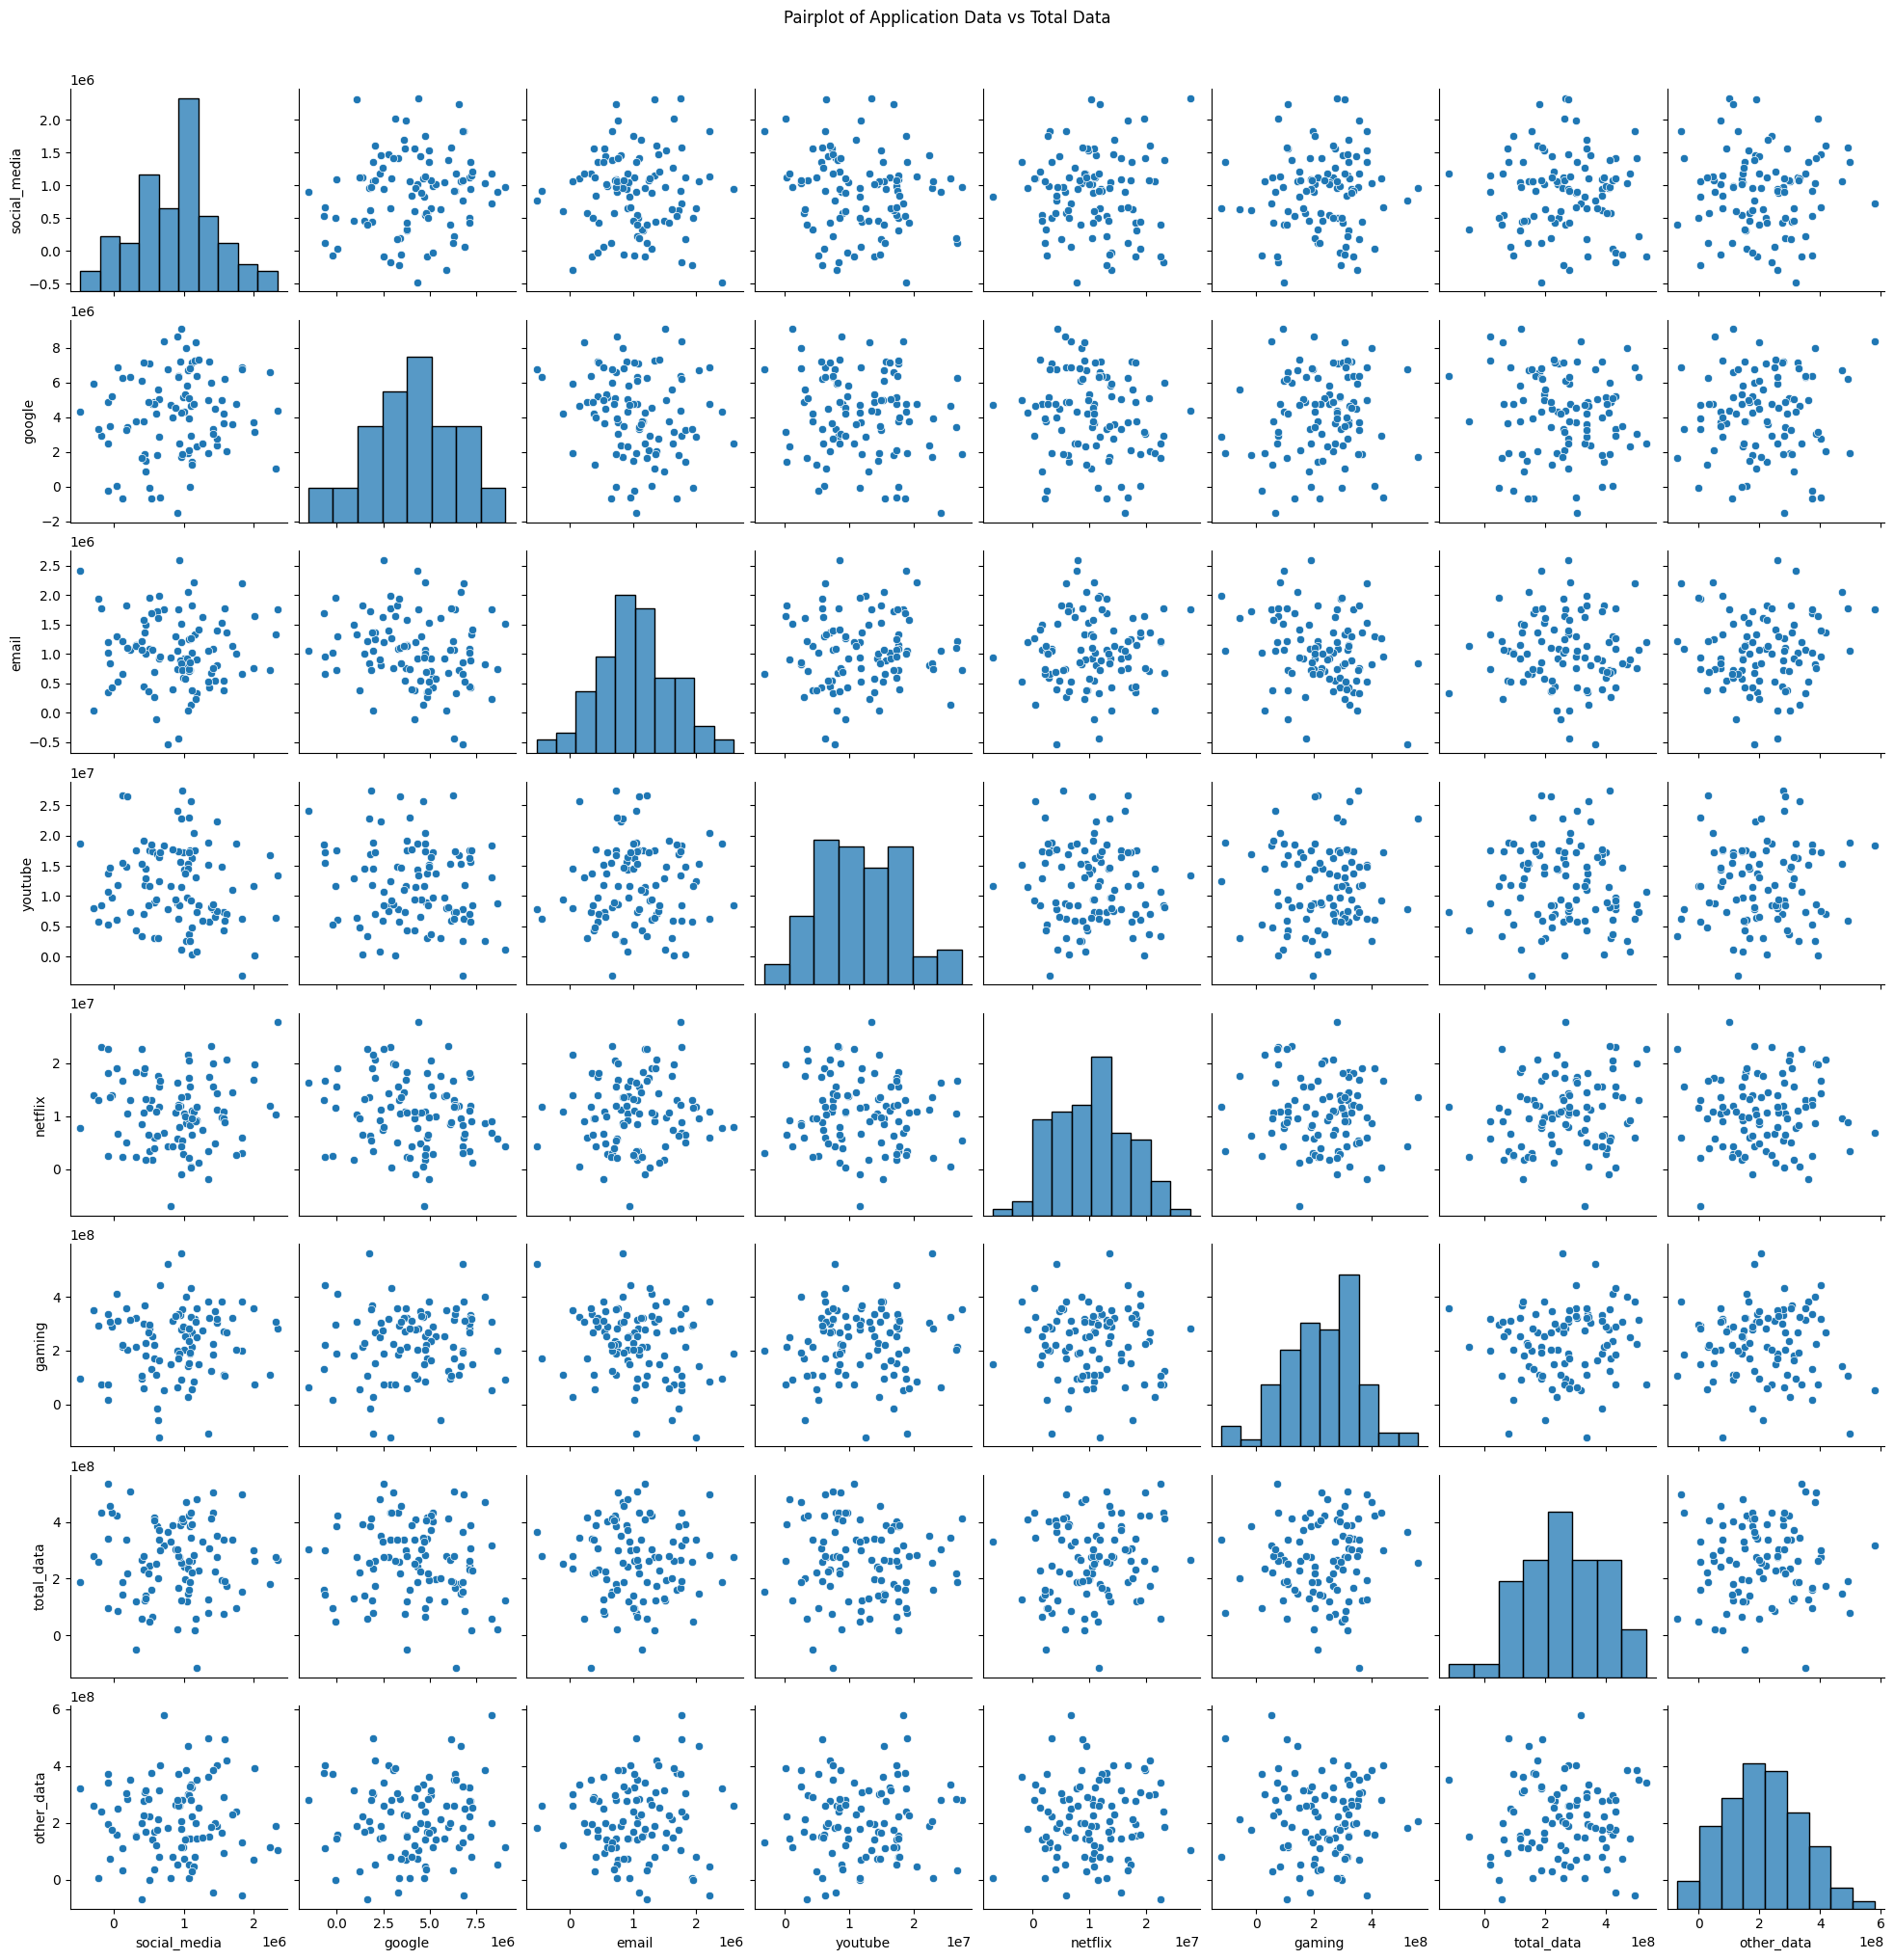


Correlation Matrix:
               social_media    google     email   youtube   netflix    gaming  \
social_media      1.000000  0.121791 -0.020931 -0.144168 -0.003972  0.063178   
google            0.121791  1.000000 -0.183753 -0.147499 -0.172784  0.109785   
email            -0.020931 -0.183753  1.000000  0.048437  0.057213 -0.248353   
youtube          -0.144168 -0.147499  0.048437  1.000000 -0.084704  0.050733   
netflix          -0.003972 -0.172784  0.057213 -0.084704  1.000000 -0.058320   
gaming            0.063178  0.109785 -0.248353  0.050733 -0.058320  1.000000   
other_data       -0.005878  0.029346  0.057689  0.042836  0.033012 -0.062854   
total_data       -0.021367 -0.084392 -0.023101 -0.068773  0.165270  0.094986   

              other_data  total_data  
social_media   -0.005878   -0.021367  
google          0.029346   -0.084392  
email           0.057689   -0.023101  
youtube         0.042836   -0.068773  
netflix         0.033012    0.165270  
gaming         -0.06285

In [4]:
from UserOverviewanalysis import generate_data, analyze_data

df = generate_data()

analyze_data(df)

In [2]:
import pandas as pd

file_path = 'C:/Users/User/Desktop/10/data-2/Week2_challenge_data_source_cleaned.csv'

df = pd.read_csv(file_path)

columns = {
    'social_media': ['social_media_dl_(bytes)', 'social_media_ul_(bytes)'],
    'google': ['google_dl_(bytes)', 'google_ul_(bytes)'],
    'email': ['email_dl_(bytes)', 'email_ul_(bytes)'],
    'youtube': ['youtube_dl_(bytes)', 'youtube_ul_(bytes)'],
    'netflix': ['netflix_dl_(bytes)', 'netflix_ul_(bytes)'],
    'gaming': ['gaming_dl_(bytes)', 'gaming_ul_(bytes)'],
    'other_data': ['other_dl_(bytes)', 'other_ul_(bytes)'],
    'total_data': ['total_dl_(bytes)', 'total_ul_(bytes)']
}

mean_results = {}
std_results = {}

for category, cols in columns.items():
    subset_df = df[cols]
    
    combined_mean = subset_df.mean().mean()
    combined_std = subset_df.std().mean()
    
    mean_results[category] = combined_mean
    std_results[category] = combined_std

duration_mean = df['dur._(ms)'].mean()
duration_std = df['dur._(ms)'].std()

print("Mean Results:")
for category, mean_value in mean_results.items():
    print(f"{category}: {mean_value:.2f}")
print(f"duration_ms: {duration_mean:.2f}")

print("\nStandard Deviation Results:")
for category, std_value in std_results.items():
    print(f"{category}: {std_value:.2f}")
print(f"duration_ms: {duration_std:.2f}")

Mean Results:
social_media: 914034.26
google: 3903418.18
email: 1128210.90
youtube: 11385539.02
netflix: 11347999.45
gaming: 215536254.41
other_data: 216507959.65
total_data: 248334438.39
duration_ms: 77536.33

Standard Deviation Results:
social_media: 527374.80
google: 2249303.92
email: 657486.60
youtube: 6539686.10
netflix: 6496748.86
gaming: 125160265.12
other_data: 122720803.75
total_data: 128465540.18
duration_ms: 28149.50
